In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive/MyDrive/Colab Notebooks/yapay zeka veriler

/content/drive/MyDrive/Colab Notebooks/yapay zeka veriler


In [3]:
import numpy as np
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_path = './Dataset/train'
valid_path = './Dataset/val'
test_path = './Dataset/test'
img_size =  (224,224,3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 30

In [5]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             channel_shift_range = 10,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

In [6]:
train_dataset = datagen.flow_from_directory(directory = train_path, 
                                                  color_mode = "rgb",
                                                  target_size = (224,224),
                                                  interpolation = 'bicubic',
                                                  class_mode = "categorical", 
                                                  shuffle = True,
                                                  batch_size = BATCH_SIZE)

validation_dataset  = datagen.flow_from_directory(directory = valid_path,
                                            color_mode = "rgb",
                                            target_size = (224,224),
                                            interpolation = 'bicubic',
                                            class_mode = "categorical",
                                            shuffle = False,
                                            batch_size = BATCH_SIZE)
test_dataset  = datagen.flow_from_directory(directory = test_path,
                                           color_mode = "rgb",
                                           target_size = (224,224),
                                           interpolation = 'bicubic',
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = BATCH_SIZE)

Found 306 images belonging to 2 classes.
Found 131 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [28]:
import tensorflow as tf
preprocess_input = tf.keras.applications.densenet.preprocess_input

In [29]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.densenet.DenseNet121(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [30]:
base_model.trainable = False

In [31]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(8, 7, 7, 1024)


In [32]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [33]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 1024)


In [34]:
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 2)


In [35]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [36]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                           

In [38]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/30
39/39 [==============================] - 145s 2s/step - loss: 0.7448 - accuracy: 0.5817 - val_loss: 0.6528 - val_accuracy: 0.6412
Epoch 2/30
39/39 [==============================] - 97s 2s/step - loss: 0.6624 - accuracy: 0.6275 - val_loss: 0.6095 - val_accuracy: 0.6565
Epoch 3/30
39/39 [==============================] - 83s 2s/step - loss: 0.6563 - accuracy: 0.6601 - val_loss: 0.5801 - val_accuracy: 0.7176
Epoch 4/30
39/39 [==============================] - 98s 3s/step - loss: 0.6164 - accuracy: 0.6569 - val_loss: 0.5266 - val_accuracy: 0.7023
Epoch 5/30
39/39 [==============================] - 100s 3s/step - loss: 0.6045 - accuracy: 0.6797 - val_loss: 0.5209 - val_accuracy: 0.7328
Epoch 6/30
39/39 [==============================] - 80s 2s/step - loss: 0.5390 - accuracy: 0.7092 - val_loss: 0.5285 - val_accuracy: 0.7634
Epoch 7/30
39/39 [==============================] - 79s 2s/step - loss: 0.5179 - accuracy: 0.7418 - val_loss: 0.4804 - val_accuracy: 0.7557
Epoch 8/30
39/39 [

In [39]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

11/11 [==============================] - 20s 2s/step - loss: 0.3061 - accuracy: 0.8736
Accuracy:  0.8735632300376892


In [40]:
from sklearn.metrics import classification_report
test_labels = test_dataset.classes 
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, y_pred, target_names = test_dataset.class_indices))

11/11 [==============================] - 42s 3s/step
              precision    recall  f1-score   support

       Curuk       0.83      0.83      0.83        29
        Taze       0.91      0.91      0.91        58

    accuracy                           0.89        87
   macro avg       0.87      0.87      0.87        87
weighted avg       0.89      0.89      0.89        87



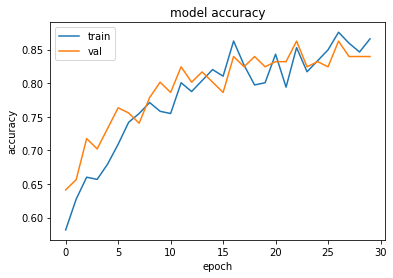

In [41]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

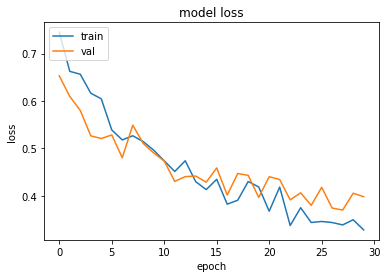

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()